In [1]:
library(GenomicRanges)
library(ChIPseeker)
library(anndata)  # for loading scATAC peak counts

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb



Registered S3 methods overwritten by 'treeio':
  method              from    
  MRCA.phylo          tidytree
  MRC

# Map MACS2 peaks to 500bp fixed peaks from ArchR

In [2]:
# Load reference scATAC-seq object, containing peaks for genomic mapping
atac = anndata::read_h5ad("../fibroblast_reanalysis/data/scATAC_PeakMatrix_fibro.processed.h5ad")

In [3]:
# get genomic coordinates
coords = sapply(strsplit(rownames(atac$var), ","), function(x) x[1])

In [4]:
coords = GRanges(coords)

In [5]:
coords

GRanges object with 407383 ranges and 0 metadata columns:
           seqnames              ranges strand
              <Rle>           <IRanges>  <Rle>
       [1]     chr1       794840-795340      *
       [2]     chr1       807550-808050      *
       [3]     chr1       811011-811511      *
       [4]     chr1       817090-817590      *
       [5]     chr1       817824-818324      *
       ...      ...                 ...    ...
  [407379]     chrX 155880997-155881497      *
  [407380]     chrX 155881594-155882094      *
  [407381]     chrX 155888133-155888633      *
  [407382]     chrX 155957678-155958178      *
  [407383]     chrX 155966811-155967311      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

In [6]:
GRanges(coords[1:10])

GRanges object with 10 ranges and 0 metadata columns:
       seqnames        ranges strand
          <Rle>     <IRanges>  <Rle>
   [1]     chr1 794840-795340      *
   [2]     chr1 807550-808050      *
   [3]     chr1 811011-811511      *
   [4]     chr1 817090-817590      *
   [5]     chr1 817824-818324      *
   [6]     chr1 818479-818979      *
   [7]     chr1 820945-821445      *
   [8]     chr1 826556-827056      *
   [9]     chr1 827241-827741      *
  [10]     chr1 830679-831179      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

## Differentially accessible peak set

In [7]:
# Load differentially accessibile peaks
tab = readRDS("tables/differential_peak_tables_FDR05_annotated.rds")

In [8]:
tab[[2]]@anno

GRanges object with 2129 ranges and 21 metadata columns:
         seqnames              ranges strand |     logFC     logCPM         F
            <Rle>           <IRanges>  <Rle> | <numeric>  <numeric> <numeric>
  206617    chr11 126124171-126124869      * |  -2.60135   1.863682   77.8621
  206709    chr11 126459555-126460178      * |  -2.15200   2.139047   63.5731
  185231    chr10   98357547-98357748      * |  -2.72675  -0.103825   53.7591
   10723     chr1   48035361-48035738      * |  -2.01273   1.526300   49.6326
  161095     chr9   27413620-27414832      * |  -2.02144   1.086582   47.5039
     ...      ...                 ...    ... .       ...        ...       ...
   21281     chr1 168503999-168504723      * | -0.882811  2.4397097   12.5590
   27473     chr1 224245185-224245699      * | -1.027206 -0.0168883   12.5572
   28959     chr1 232902122-232902670      * | -0.972632  0.6506020   12.5557
  189009    chr10 124296118-124296721      * | -0.972945  0.6385621   12.5555
  27998

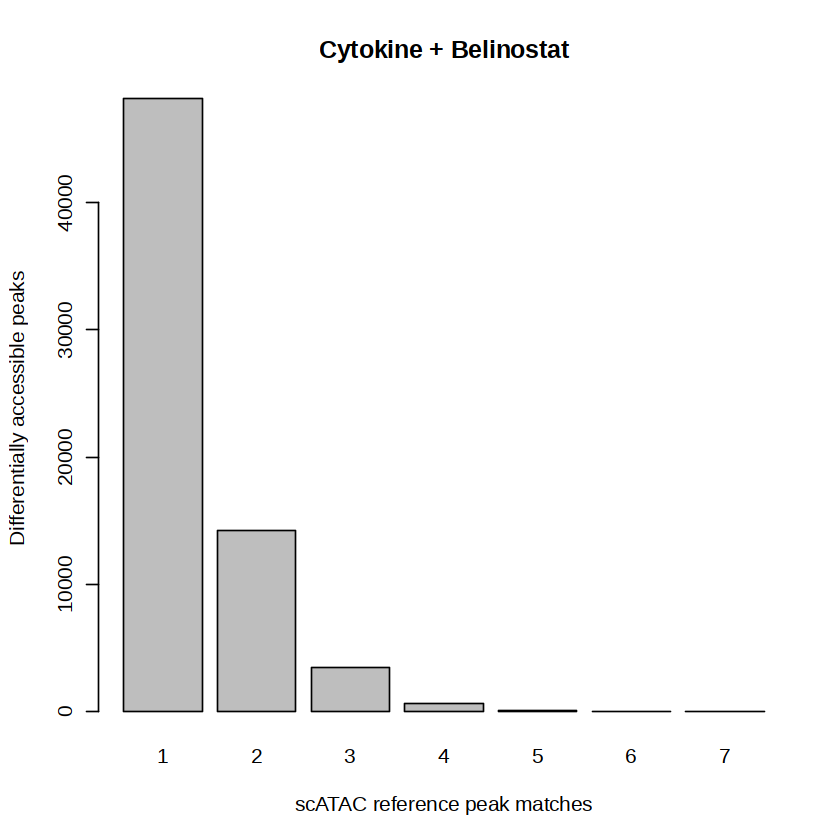

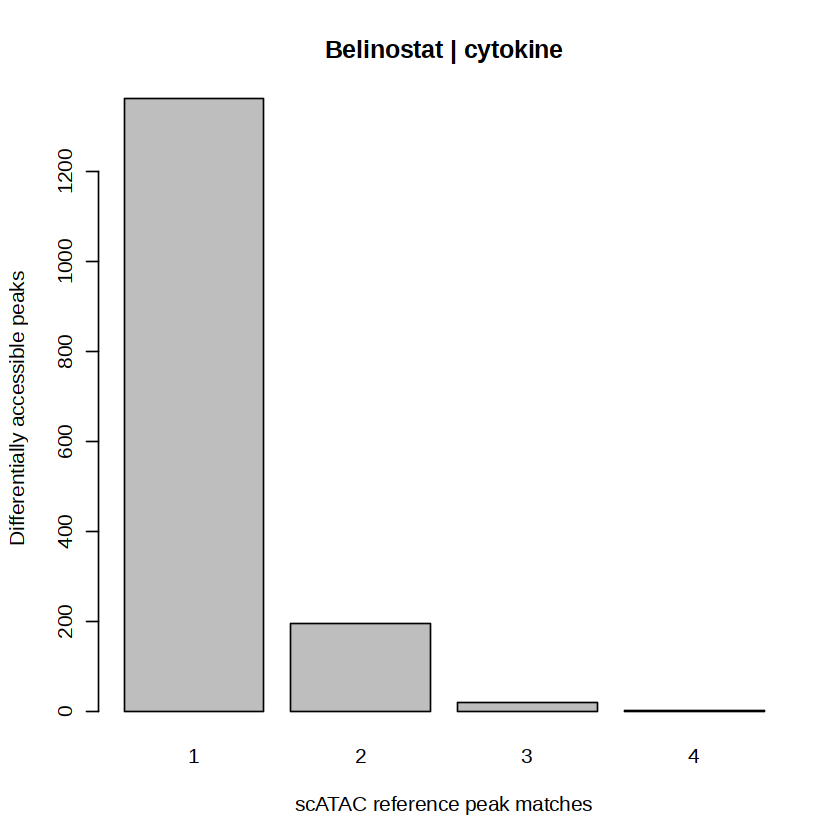

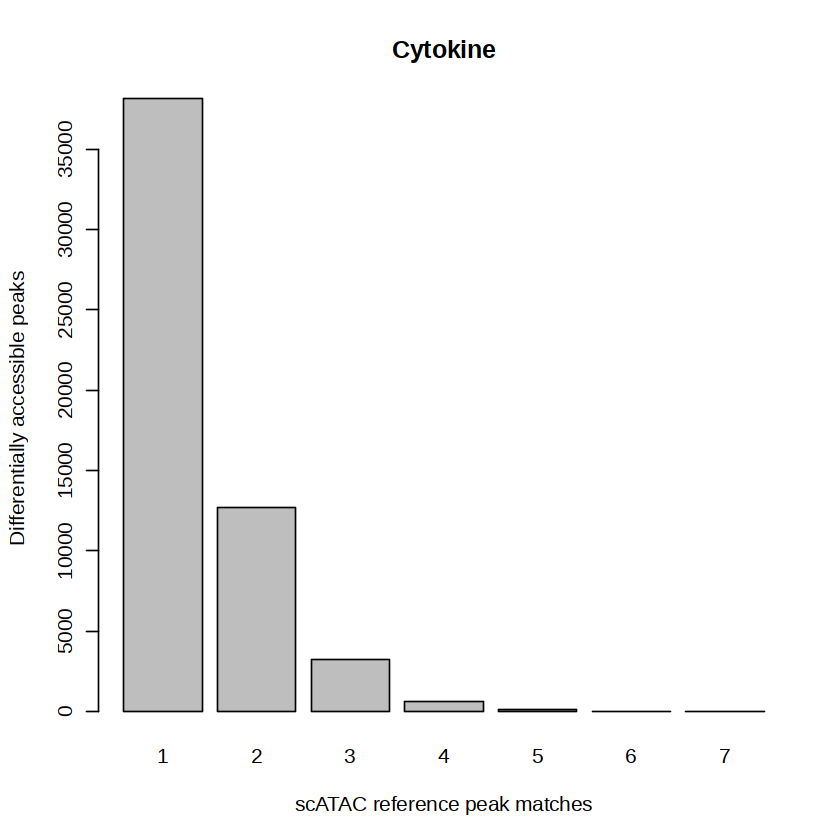

In [9]:
for (k in 1:length(tab)) {
    overlap = findOverlaps(tab[[k]]@anno, coords, minoverlap=300)
    overlap

    # Plot distribution of matches per peak
    barplot(table(table(overlap@from)), xlab="scATAC reference peak matches", ylab="Differentially accessible peaks", main=names(tab)[k])

    # Assign peak to single peak
    tab[[k]]@anno$atac_peak = NA
    tab[[k]]@anno$atac_peak[overlap@from] = rownames(atac$var)[overlap@to]
}

In [10]:
names(tab)

[1] "Cytokine + Belinostat" "Belinostat | cytokine" "Cytokine"

In [11]:
k = 1
tab[[k]]@anno

GRanges object with 96768 ranges and 22 metadata columns:
         seqnames              ranges strand |     logFC    logCPM         F
            <Rle>           <IRanges>  <Rle> | <numeric> <numeric> <numeric>
  206617    chr11 126124171-126124869      * |  -3.72328   1.86368   160.931
  163915     chr9   80797128-80798753      * |  -3.21181   1.79768   131.897
  204193    chr11 112655241-112656052      * |  -3.11845   1.31645   122.162
  159234     chr9         65443-65969      * |  -3.11693   1.25625   120.159
  153038     chr8   95996526-95997373      * |  -3.03374   1.67887   118.532
     ...      ...                 ...    ... .       ...       ...       ...
   29750     chr1 240143241-240144905      * |  1.137175 -1.134723   7.55232
  329049     chrX   53312981-53313814      * | -0.709891  0.383661   6.82475
  120365     chr6 125169194-125169433      * | -1.050576 -1.517451   5.59798
   49564     chr2 171958539-171958784      * | -0.935336 -1.289228   5.59789
  329827     chrX 

In [12]:
# Write tables with matched scATAC peaks as .csv files
for (k in 1:length(tab)) {
    write.csv(tab[[k]]@anno, paste0("tables/", "differential_peak_table_FDR05_annotated_matched_", names(tab)[k], ".csv"),
        row.names=FALSE
    ) 
}


## All peak tables

In [13]:
tab_all = readRDS("tables/peak_table_all_PCA_loadings.rds")

Hits object with 170205 hits and 0 metadata columns:
           queryHits subjectHits
           <integer>   <integer>
       [1]        20           2
       [2]        21           3
       [3]        22           4
       [4]        22           5
       [5]        22           6
       ...       ...         ...
  [170201]    334778      407376
  [170202]    334779      407378
  [170203]    334781      407379
  [170204]    334781      407380
  [170205]    334782      407381
  -------
  queryLength: 334850 / subjectLength: 407383

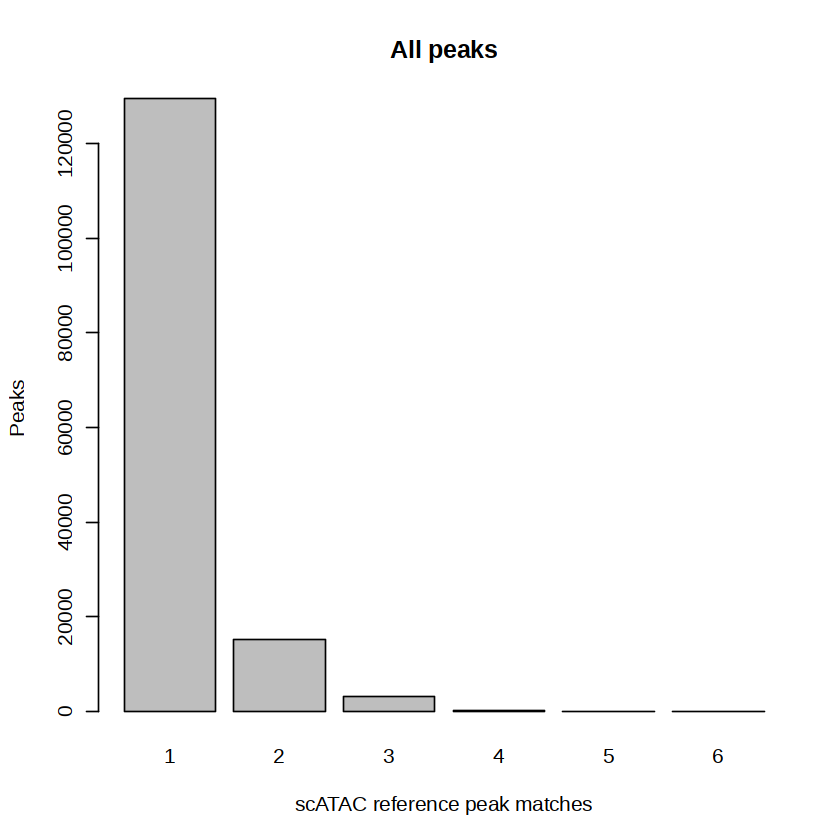

In [14]:
#overlap = findOverlaps(tab_all@anno, coords, minoverlap=300)

overlap = findOverlaps(tab_all@anno, coords, minoverlap=100)
overlap

# Plot distribution of matches per peak
barplot(table(table(overlap@from)), xlab="scATAC reference peak matches", ylab="Peaks", main="All peaks")

# Assign peak to single peak
tab_all@anno$atac_peak = NA
tab_all@anno$atac_peak[overlap@from] = rownames(atac$var)[overlap@to]

In [15]:
# map rate
sum(!is.na(tab_all@anno$atac_peak)) / length(tab_all@anno)

[1] 0.4423145

In [16]:
write.csv(tab_all@anno, "tables/peak_table_all_PCA_loadings_matched.csv", row.names=FALSE) 

In [17]:
#tab_all